# 🚀 Objective: Categorical Naive Bayes Implementation
# 💡 Own Code: Python Implementation for Digesting Concept
# 🎯 Purpose: Mastering the Essence of Naive Bayes!

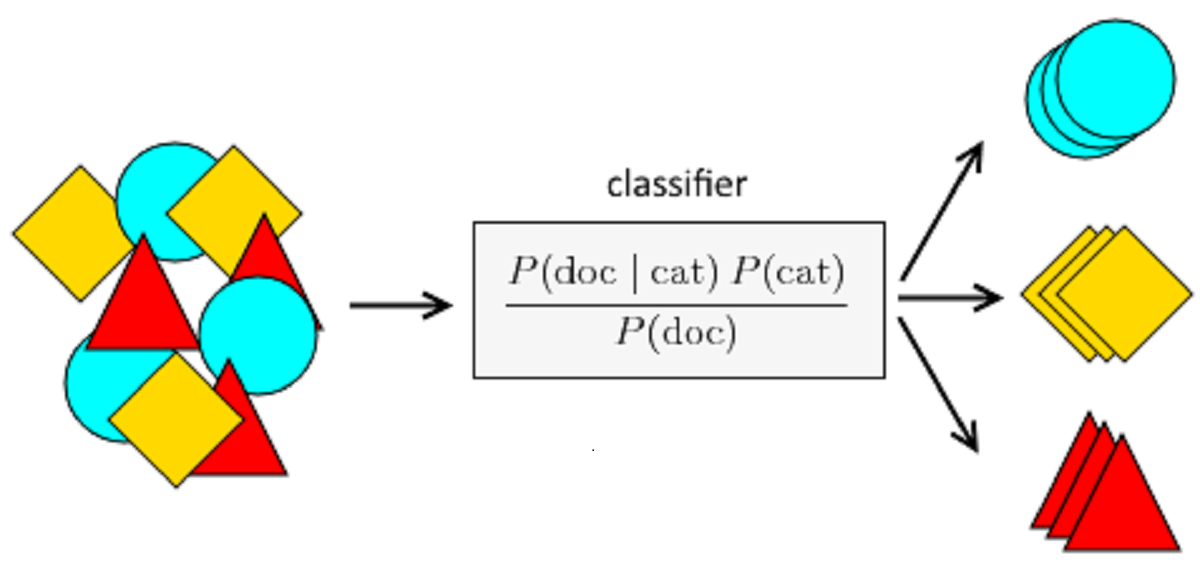


# Categorical Naive Bayes
- CategoricalNB implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature is independent
- P(A ∩ B) = P(A) . P(B) - Multiplication Rule of Probability - If A and B are two independent events

# 1. Load Python Modules

In [1]:
#numpy and pandas initialization
import numpy as np
import pandas as pd
from tabulate import tabulate

# 2. Read the Dataset from CSV file  - Using Pandas

In [2]:
#Loading the dataset
income_df = pd.read_csv("income-buy.csv")

# 3. Basic Inspection on given dataset

In [3]:
income_df

,age,income,student,credit_rating,buy
0,Youth,High,No,Fair,No
1,Youth,High,No,Excellent,No
2,Middle,High,No,Fair,Yes
3,Senior,Medium,No,Fair,Yes
4,Senior,Low,Yes,Fair,Yes
5,Senior,Low,Yes,Excellent,No
6,Middle,Low,Yes,Excellent,Yes
7,Youth,High,No,Fair,No
8,Youth,Low,Yes,Fair,Yes
9,Senior,Medium,Yes,Fair,Yes


In [4]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14 non-null     object
 1   income         14 non-null     object
 2   student        14 non-null     object
 3   credit_rating  14 non-null     object
 4   buy            14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [5]:
income_df.select_dtypes(include='object').columns

Index(['age', 'income', 'student', 'credit_rating', 'buy'], dtype='object')

# 4. Implementation of the own code - using python

In [6]:
num_yes_labels = len(income_df[income_df['buy']=='Yes'])
num_no_labels = len(income_df[income_df['buy']=='No'])
total_lables = len(income_df)

print("num_yes_labels",num_yes_labels)
print("num_no_labels",num_no_labels)
print("total_lables",total_lables)

num_yes_labels 9
num_no_labels 5
total_lables 14


In [7]:
# Initialize an empty dictionary to store category probabilities
category_probabilities = {}

for col in income_df.select_dtypes(include='object').columns:
    # Perform cross-tabulation
    cross_tab = pd.crosstab(income_df[col], income_df['buy'])
    #print(cross_tab)
    # Convert cross-tabulation to a nicely formatted table
    table = tabulate(cross_tab, headers='keys', tablefmt='fancy_grid')
    print(table)
    print("===========================")
    
    # Extract probabilities for 'yes' and 'no' from the cross-tabulation
    prob_yes = round(cross_tab['Yes']/num_yes_labels,2)
    prob_no = round(cross_tab['No']/num_no_labels,2)
    
    # Store probabilities in the dictionary
    category_probabilities[col] = {'Yes': prob_yes.to_dict(), 'No': prob_no.to_dict()}

category_probabilities['buy']['Yes']['Yes'] = round(num_yes_labels/total_lables,2)
category_probabilities['buy']['No']['No']=round(num_no_labels/total_lables,2)
print(category_probabilities)


╒════════╤══════╤═══════╕
│ age    │   No │   Yes │
╞════════╪══════╪═══════╡
│ Middle │    0 │     4 │
├────────┼──────┼───────┤
│ Senior │    2 │     3 │
├────────┼──────┼───────┤
│ Youth  │    3 │     2 │
╘════════╧══════╧═══════╛
╒══════════╤══════╤═══════╕
│ income   │   No │   Yes │
╞══════════╪══════╪═══════╡
│ High     │    4 │     3 │
├──────────┼──────┼───────┤
│ Low      │    1 │     3 │
├──────────┼──────┼───────┤
│ Medium   │    0 │     3 │
╘══════════╧══════╧═══════╛
╒═══════════╤══════╤═══════╕
│ student   │   No │   Yes │
╞═══════════╪══════╪═══════╡
│ No        │    4 │     3 │
├───────────┼──────┼───────┤
│ Yes       │    1 │     6 │
╘═══════════╧══════╧═══════╛
╒═════════════════╤══════╤═══════╕
│ credit_rating   │   No │   Yes │
╞═════════════════╪══════╪═══════╡
│ Excellent       │    3 │     3 │
├─────────────────┼──────┼───────┤
│ Fair            │    2 │     6 │
╘═════════════════╧══════╧═══════╛
╒═══════╤══════╤═══════╕
│ buy   │   No │   Yes │
╞═══════╪══════╪

In [8]:
def CategoricalNB(d):
    # Calculate the probability of buying when the outcome is 'Yes'
    prob_buy_yes = (
        category_probabilities["age"]["Yes"][d["age"]] *
        category_probabilities["income"]["Yes"][d["income"]] *
        category_probabilities["student"]["Yes"][d["student"]] *
        category_probabilities['credit_rating']['Yes'][d['credit_rating']] *
        category_probabilities['buy']['Yes']['Yes']
    )
    
    # Calculate the probability of not buying when the outcome is 'No'
    prob_buy_no = (
        category_probabilities["age"]["No"][d["age"]] *
        category_probabilities["income"]["No"][d["income"]] *
        category_probabilities["student"]["No"][d["student"]] *
        category_probabilities['credit_rating']['No'][d['credit_rating']] *
        category_probabilities['buy']['No']['No']
    )
    
    # Print the probability of buying when the outcome is 'Yes'
    print("prob_buy_yes",prob_buy_yes)
    
    # Print the probability of not buying when the outcome is 'No'
    print("prob_buy_no", prob_buy_no)
    
    # Compare the probabilities and print the decision whether to buy or not
    if prob_buy_yes > prob_buy_no:
        print("Class Type Buy: Yes")
    else:
        print("Class Type Buy: No") 

# 5. Test the code / Model

In [9]:
#age= youth , income: medium , student:yes , credit_rating=fair == calcuate the class buy: yes or not
d = {"age":"Youth", "income":"Medium","student":"Yes","credit_rating":"Fair"}
print(d)
CategoricalNB(d)

{'age': 'Youth', 'income': 'Medium', 'student': 'Yes', 'credit_rating': 'Fair'}
prob_buy_yes 0.020857689600000003
prob_buy_no 0.0
Class Type Buy: Yes


# 6. Conclusions

1. It assumes that each feature is independent
2. For categorically distributed data - categorical inputs
3. There is issue the zero probability of given feature w.r.t output/target - solved using Laplace Smoothing